# 케라스 신경망 모델 구성법

In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [2]:
# @title
import os
from IPython.core.magic import register_cell_magic
from IPython import get_ipython

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## 신경망 모델 구성법 1: `Sequential` 모델 활용

#### The Sequential model

In [3]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [5]:
model.weights

[]

In [6]:
model.build(input_shape=(None, 3))
model.weights

[<Variable path=sequential_1/dense_2/kernel, shape=(3, 64), dtype=float32, value=[[-0.08440487  0.25475746  0.09411731 -0.21338283 -0.1253513  -0.2936952
   -0.03170115  0.1513685   0.23065233 -0.02151009  0.22190624  0.17706177
   -0.21061525  0.26311094  0.22980529  0.22367859  0.099608    0.26812506
    0.1356568  -0.21635023 -0.17603344 -0.27473092  0.24173838  0.19421399
    0.26178497 -0.04666436 -0.08758575 -0.18579456  0.26612836  0.20268792
    0.01433754 -0.25045624  0.09589416  0.00094664 -0.01789692 -0.21304607
    0.21894693  0.19815814 -0.05848056 -0.28213763  0.22144043 -0.20966798
   -0.24755496 -0.18383086  0.2243833  -0.13209091 -0.15215075  0.14979386
    0.01783007 -0.04656968  0.03331339 -0.13058285 -0.13895988 -0.25590333
   -0.22784567  0.00256637  0.10484689 -0.22356725 -0.10998484 -0.12567906
   -0.08392327  0.22594178 -0.14418738 -0.15462886]
  [-0.14334184 -0.1444092  -0.27688402  0.2058596   0.2236147   0.2213136
    0.17005125 -0.22806491  0.03329992  0.118

**`summary()` 메서드**

정의된 모델 구성을 요약해서 보여준다.

- 모델과 층의 이름
- 층별 파라미터 수
- 층별 파라미터 수
- 모델 전체 파라미터 수
    - 학습(trainable) 파라미터 수
    - 비학습(non-trainable) 파라미터 수

In [7]:
model.summary(line_length=80)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                   │ (None, 64)               │           256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                   │ (None, 10)               │           650 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary(line_length=80)

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)            │ (None, 64)               │           256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ my_last_layer (Dense)             │ (None, 10)               │           650 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**`Input()` 함수**

`Input()`함수를 이용하여 모델 훈련에 사용될 입력값에 대한 정보를 모델에 미리 전달할 수 있다. 
이렇게 입력값의 정보를 미리 지정하면 지정된 모양의 훈련셋만 사용할 수 있다.

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [10]:
model.summary(line_length=80)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                   │ (None, 64)               │           256 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.add(layers.Dense(10, activation="softmax"))
model.summary(line_length=80)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                   │ (None, 64)               │           256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_5 (Dense)                   │ (None, 10)               │           650 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## 신경망 모델 구성법 2: 함수형 API

##### A simple example

In [12]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

In [13]:
inputs = keras.Input(shape=(3,), name="my_input")

In [14]:
inputs.shape

(None, 3)

In [15]:
inputs.dtype

'float32'

In [16]:
features = layers.Dense(64, activation="relu")(inputs)

In [17]:
features.shape

(None, 64)

In [18]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

In [19]:
model.summary(line_length=80)

Model: "my_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)             │ (None, 3)                │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_8 (Dense)                   │ (None, 64)               │           256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_9 (Dense)                   │ (None, 10)               │           650 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### 다중 입력, 다중 출력 모델

**예제: 고객 요구사항 접수 모델**

고객의 요구사항이 입력되었을 때 처리 우선순위와 담당부서를 지정하는 시스템을 구현하려 한다. 고객의 요구사항은 세 종류의 입력값으로 구성된다. 따라서 시스템에 사용될 딥러닝 신경망 모델은 세 개의 입력값과 두 개의 출력값을 사용한다.

In [20]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu", name="dense_features")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department"
)(features)

model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department],
)

##### 다중 입력, 다중 출력 모델 훈련

- 모델 컴파일: 지정된 타깃 수만큼 손실함수와 측정 기준을 지정해야 한다.
- 모델 훈련: 적절한 개수의 입력 텐서와 타깃 텐서를 지정해야 한다. 
    - 여기서는 훈련 과정을 설명하기 위해 적절한 모양의 입력 텐서 3개와 타깃 텐서 2개를 무작위로 생성해서 사용한다.
    - `fit()` 함수에 세 개의 훈련 텐서로 이루어진 리스트와 두 개의 타깃 텐서로 이루어진 리스트를 지정한 후에 실행한다. 
- 모델 평가: 훈련과 동일한 방식의 인자가 사용된다.
- 모델 활용: 예측값은 두 개의 어레이로 구성된 리스트이다.

In [21]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, num_departments, size=(num_samples, 1))

model.compile(
    optimizer="adam",
    loss=["mean_squared_error", "sparse_categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs=1,
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - department_accuracy: 0.2531 - department_loss: 8.6002 - loss: 8.9281 - priority_loss: 0.3278 - priority_mean_absolute_error: 0.4932
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.3391 - department_loss: 8.3580 - loss: 8.6863 - priority_loss: 0.3284 - priority_mean_absolute_error: 0.4928
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
priority_preds

array([[5.7433459e-17],
       [3.1339759e-17],
       [5.7077208e-18],
       ...,
       [9.6938007e-18],
       [4.4466043e-17],
       [9.0876451e-17]], shape=(1280, 1), dtype=float32)

In [23]:
department_preds

array([[9.69838947e-02, 2.13300172e-33, 9.03016090e-01, 1.38018370e-39],
       [4.29145806e-02, 2.43968673e-33, 9.57085431e-01, 6.15855261e-40],
       [5.37735105e-01, 6.56720500e-34, 4.62264895e-01, 1.11924511e-40],
       ...,
       [1.01950705e-01, 2.49094600e-34, 8.98049235e-01, 2.80907093e-40],
       [6.64487630e-02, 4.60936682e-33, 9.33551311e-01, 6.99735586e-40],
       [3.89467180e-01, 1.65185521e-32, 6.10532820e-01, 1.51026343e-40]],
      shape=(1280, 4), dtype=float32)

In [24]:
department_preds.argmax(axis=1)

array([2, 2, 0, ..., 2, 2, 2], shape=(1280,))

아래 방식도 가능

In [25]:
model.compile(
    optimizer="adam",
    loss={
        "priority": "mean_squared_error",
        "department": "sparse_categorical_crossentropy",
    },
    metrics={
        "priority": ["mean_absolute_error"],
        "department": ["accuracy"],
    },
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - department_accuracy: 0.2547 - department_loss: 11.9562 - loss: 12.2846 - priority_loss: 0.3284 - priority_mean_absolute_error: 0.4928
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2539 - department_loss: 12.0256 - loss: 12.3540 - priority_loss: 0.3284 - priority_mean_absolute_error: 0.4928
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### 신경망 모델 구조 그래프 

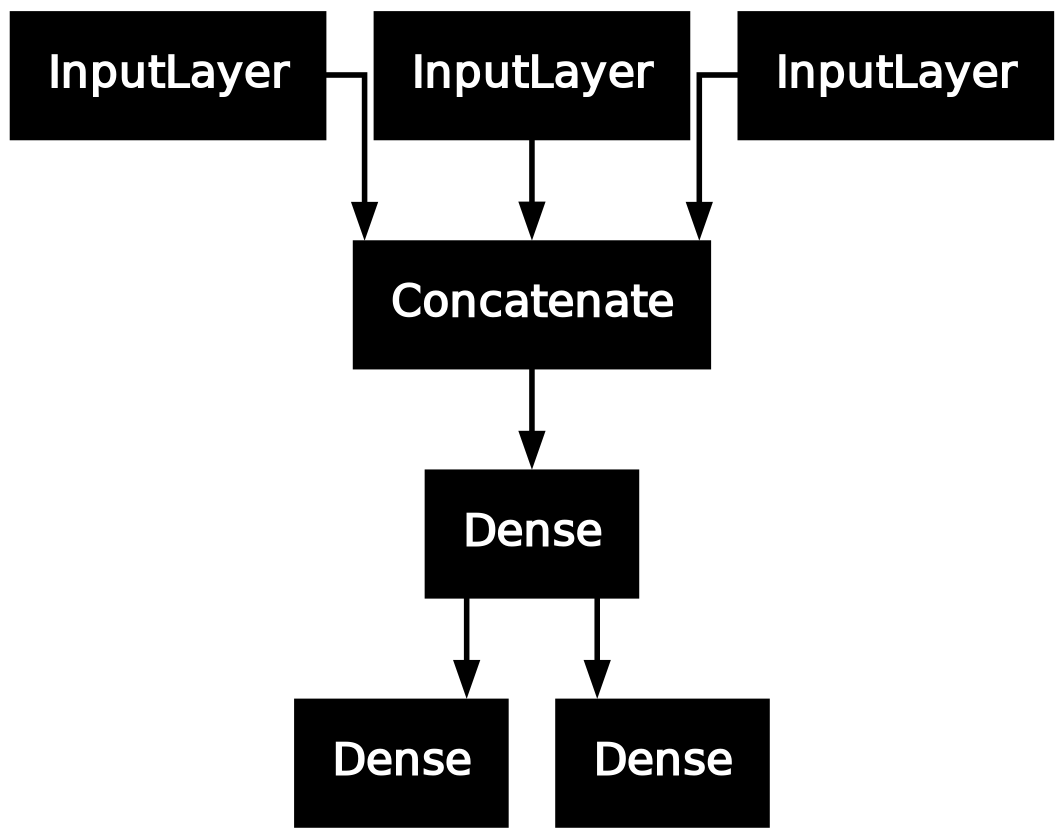

In [26]:
keras.utils.plot_model(model, "ticket_classifier.png")

입력 텐서와 출력 텐서의 모양을 함께 표기할 수도 있다.

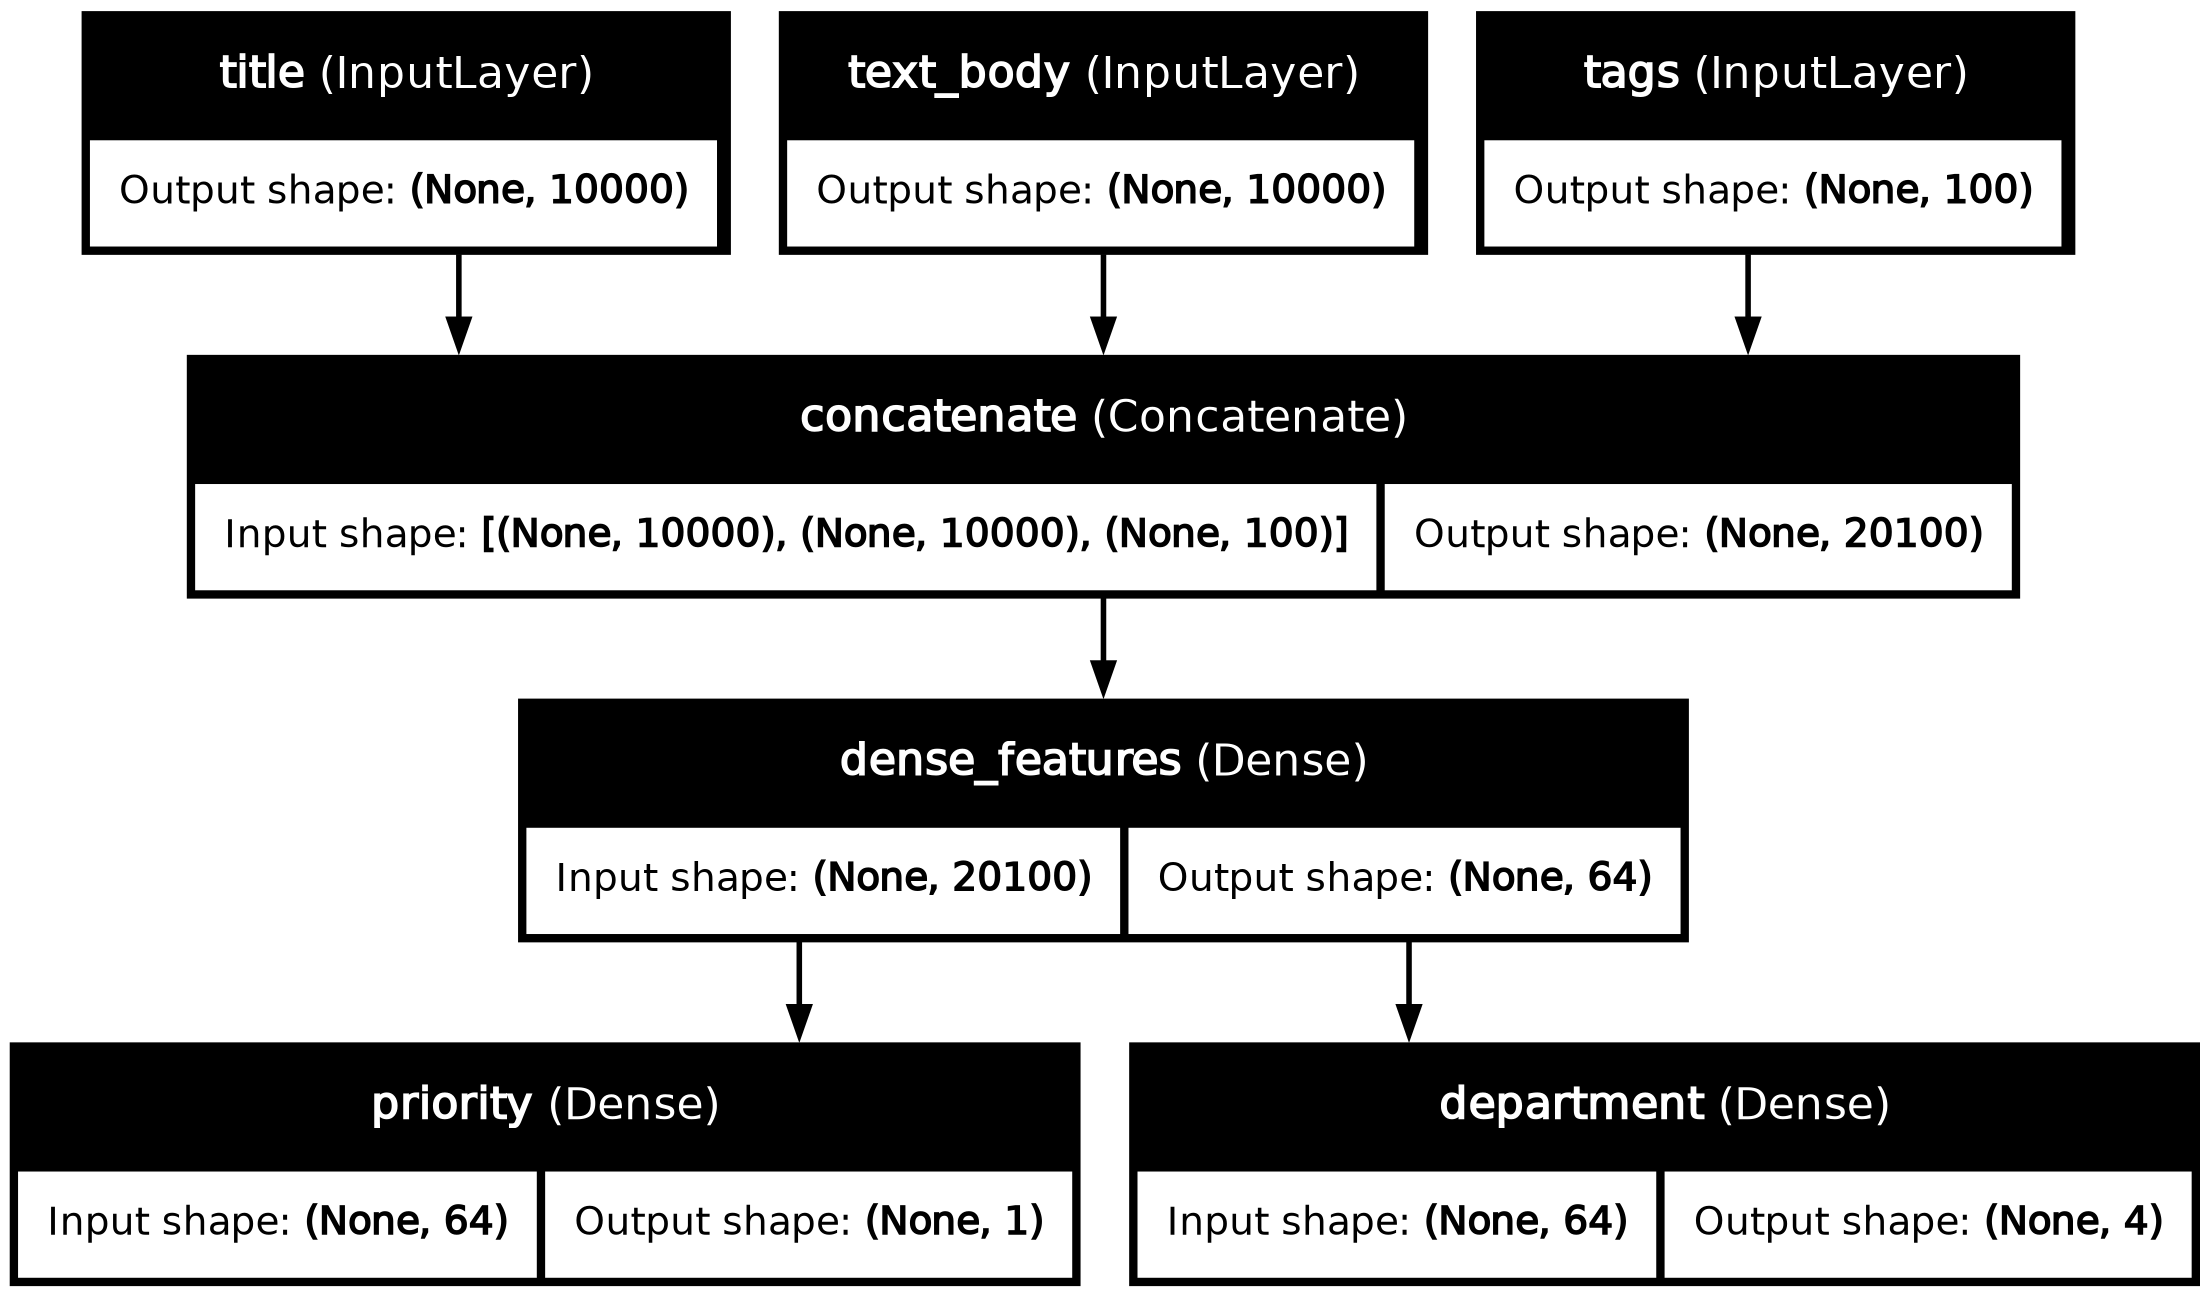

In [28]:
keras.utils.plot_model(
    model,
    "ticket_classifier_with_shape_info.png",
    show_shapes=True,
    show_layer_names=True,
)

###### Feature extraction with a Functional model

In [29]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_features, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [30]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, ragged=False, name=tags>]

In [31]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_14>

In [32]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

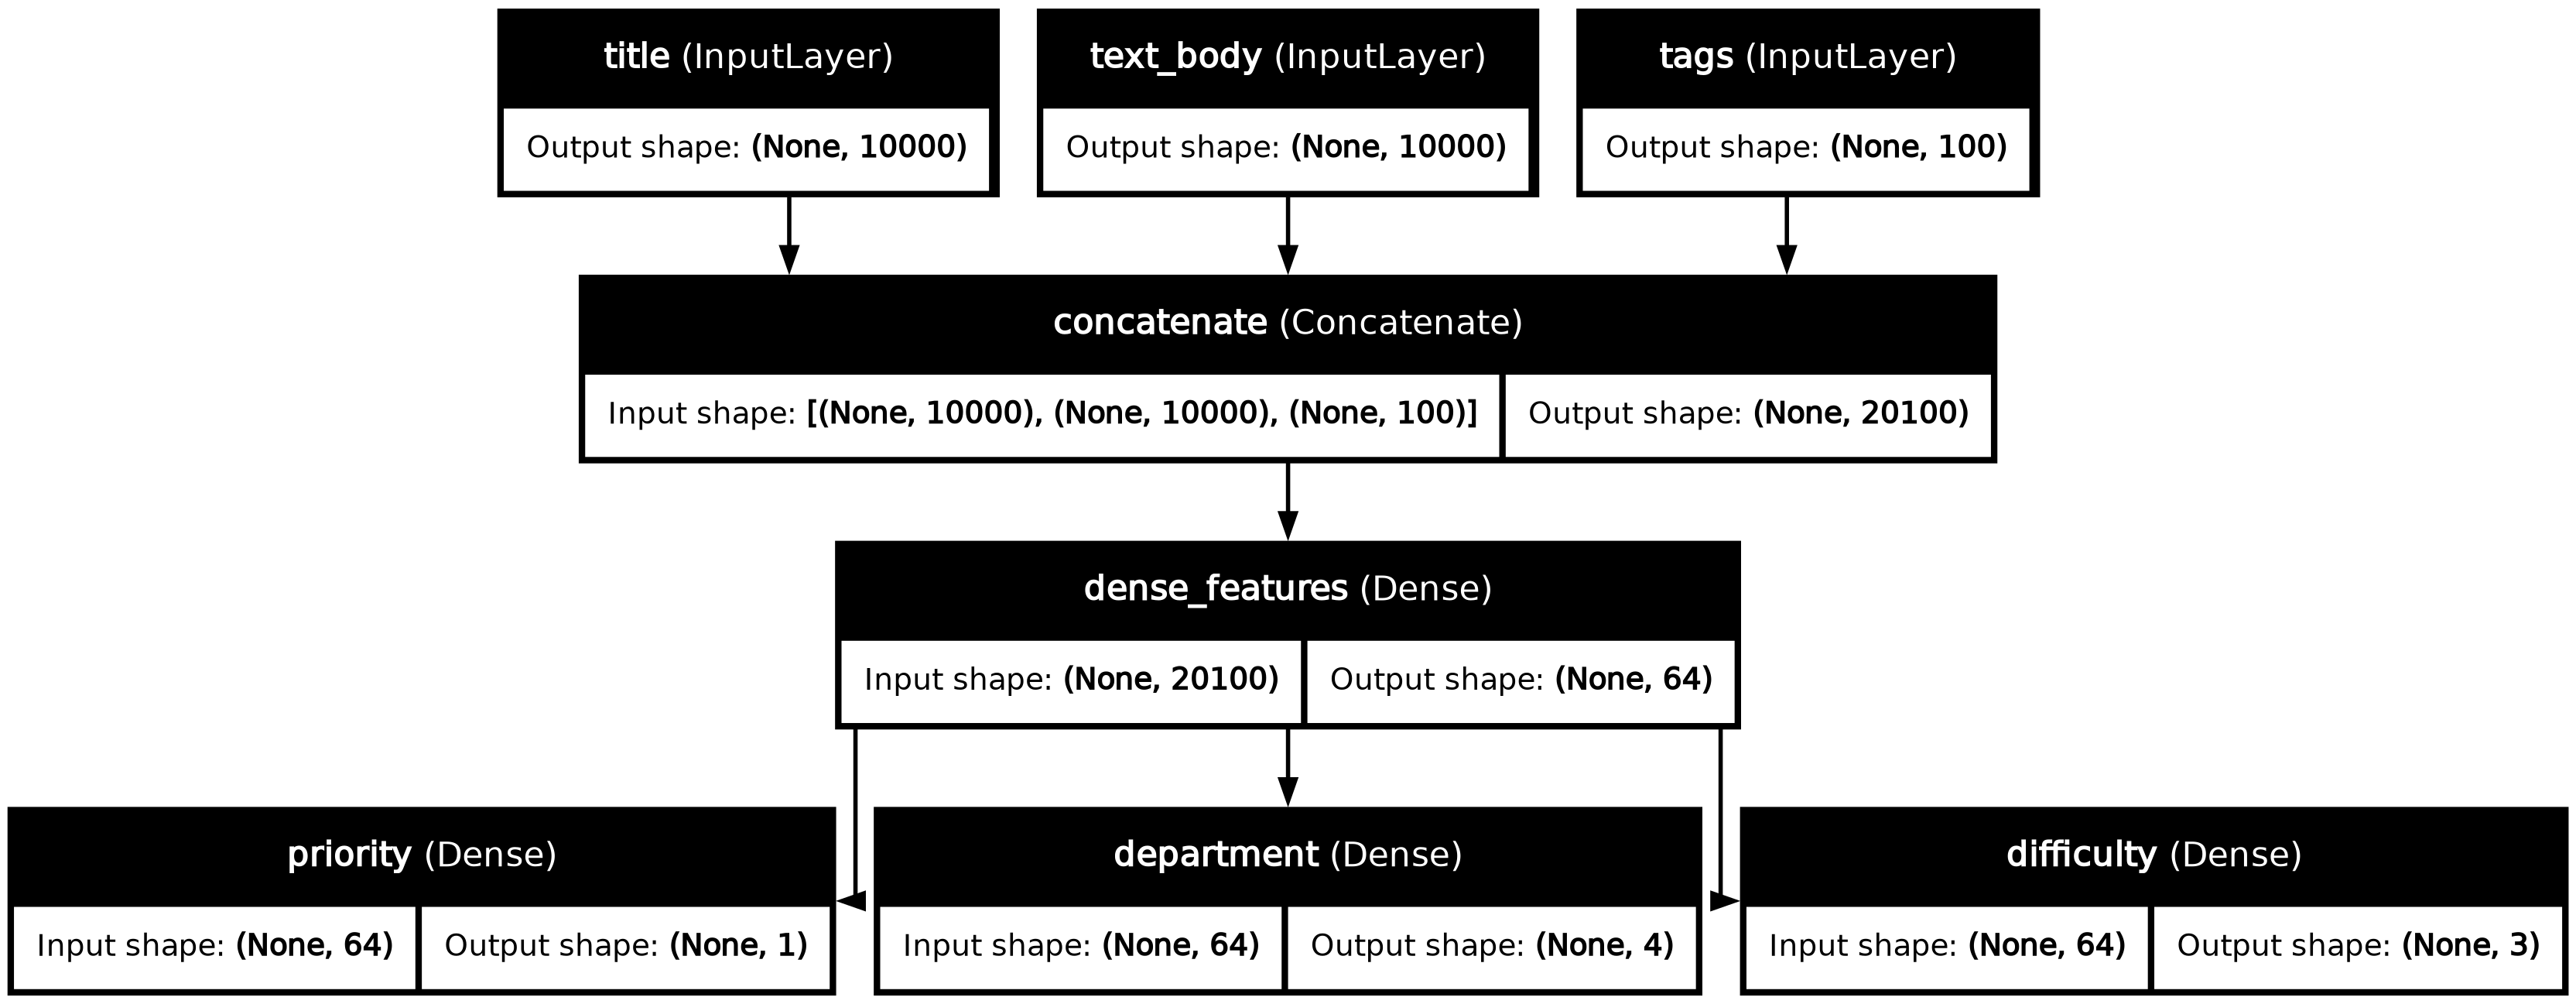

In [33]:
keras.utils.plot_model(
    new_model,
    "updated_ticket_classifier.png",
    show_shapes=True,
    show_layer_names=True,
)

## 신경망 모델 구성법 3: 서브클래싱

앞서 함수형 API로 구성한 티켓 모델을 서브클래싱을 기법을 이용하여 구현하면 다음과 같다.

서브클래싱으로 모델 클래서를 선언하려면 아래 두 메서드를 목적에 맞추어 
재정의<font size='2'>overriding</font>한다.

- `__init__()` 메서드(생성자): 은닉층과 출력층으로 사용될 층 객체 지정
- `call()` 메서드: 층을 연결하는 과정 지정. 즉, 입력값으부터 출력값을 만들어내는 순전파 과정 묘사.

##### Rewriting our previous example as a subclassed model

In [34]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax"
        )

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

모델 구성은 해당 모델의 객체를 생성하면 된다.
이전과 동일한 구성의 모델은 다음과 같이 선언한다.

In [35]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

컴파일, 훈련, 평가, 예측은 이전과 완전히 동일한 방식으로 실행된다.

In [36]:
model.compile(
    optimizer="adam",
    loss=["mean_squared_error", "sparse_categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
    epochs=1,
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.2641 - loss: 11.9045 - mean_absolute_error: 0.4815 - mean_squared_error_loss: 0.3171 - sparse_categorical_crossentropy_loss: 11.5874
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2617 - loss: 12.2281 - mean_absolute_error: 0.4928 - mean_squared_error_loss: 0.3284 - sparse_categorical_crossentropy_loss: 11.8997 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


##### Beware: What subclassed models don't support

## 혼합 신경망 모델 구성법

소개된 세 가지 방식을 임의로 혼합하여 활용할 수 있다. 
무엇보다도 모델 클래스가 층의 하위 클래스이기에 
선언된/훈련된 모델을 다른 모델의 하나의 층으로 활용할 수도 있다.

**예제: 서브클래싱 모델을 함수형 모델에 활용하기** (강추!!!)

설명을 위해 먼저 서브클래싱으로 하나의 모델을 선언한다.

- 한 개의 밀집층만 사용
- 이진 분류인 경우: 하나의 유닛과 `sigmoid` 활성화 함수 사용
- 다중 클래스 분류인 경우: 클래스(범주) 수 만큼의 유닛과  `softmax` 활성화 함수 사용

In [37]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**예제: 함수형 모델을 서브클래싱 모델에 활용하기**

- 설명을 위해 먼저 함수형 API 형식으로 하나의 모델을 선언한다.
- 아래 `MyModel` 클래스는 앞서 선언한 `binary_classifier` 모델을 출력층으로 활용한다.

In [38]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

#### Remember: Use the right tool for the job

## 신경망 모델의 구성, 훈련, 평가, 예측

신경망 모델의 구성, 훈련, 평가, 예측은 정해진 방식으로 차례대로 이루어진다.
아래 코드는 MNIST 데이터셋을 이용한 모델 훈련 전반 과정을 보여준다.

In [39]:
from keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(val_images, val_labels),
)
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9128 - loss: 0.2910 - val_accuracy: 0.9579 - val_loss: 0.1433
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.1466 - val_accuracy: 0.9678 - val_loss: 0.1065
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1155 - val_accuracy: 0.9758 - val_loss: 0.0781
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0775  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


#### 사용자 정의 평가지표 선언

In [40]:
from keras import ops

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros"
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = ops.one_hot(y_true, num_classes=ops.shape(y_pred)[1])
        mse = ops.sum(ops.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = ops.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return ops.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0.)

In [41]:
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()],
)
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(val_images, val_labels),
)
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9138 - loss: 0.2909 - rmse: 0.3627 - val_accuracy: 0.9570 - val_loss: 0.1440 - val_rmse: 0.2568
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9543 - loss: 0.1487 - rmse: 0.2636 - val_accuracy: 0.9686 - val_loss: 0.1016 - val_rmse: 0.2170
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1129 - rmse: 0.2311 - val_accuracy: 0.9751 - val_loss: 0.0849 - val_rmse: 0.1962
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0856 - rmse: 0.1988


### 콜백 활용

컴퓨터 프로그래밍에서 **콜백**<font size='2'>callback</font>은
하나의 프로그램이 실행되는 도중에 추가적으로 다른 API를 호출하는 기능 또는 해당 API를 가리킨다.
호출된 콜백은 자신을 호출한 프로그램과 독립적으로 실행된다.

신경망 모델 훈련 과정에서 사용될 수 있는 다양한 콜백 기능을 케라스가 제공한다.
일반적으로 손실값, 평가지표 등 훈련 중에 계산되는 기록을 저장하여 활용하며,
가장 많이 활용되는 콜백은 다음과 같다.

```python
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger
```

여기서는 `EarlyStopping`과 `ModelCheckpoint` 두 콜백의 기능을 살펴본다.

**`fit()` 메서드에서 `callbacks` 인자 사용하기**

아래 코드에 사용된 옵션은 다음과 같다.

- `EarlyStopping`: 검증셋에 대한 정확도가 2 에포크(epoch) 연속 개선되지 않을 때 훈련 종료
- `ModelCheckpoint`: 매 에포크마다 훈련된 모델 저장. 
    `save_best_only=True`가 설정된 경우 검증셋에 대한 손실값이 가장 낮은 모델만 저장.

In [42]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=1,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9117 - loss: 0.2907 - val_accuracy: 0.9571 - val_loss: 0.1381
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9542 - loss: 0.1492 - val_accuracy: 0.9701 - val_loss: 0.0986
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.1149 - val_accuracy: 0.9729 - val_loss: 0.0914
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9699 - loss: 0.0975 - val_accuracy: 0.9767 - val_loss: 0.0781
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9732 - loss: 0.0865 - val_accuracy: 0.9757 - val_loss: 0.0835
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0767 - val_accuracy: 0.9792 - val_loss: 0.0757
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0710 - val_accuracy: 0.9771 - val_loss: 0.0821
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0650 - 

In [43]:
model = keras.models.load_model("checkpoint_path.keras")

#### 사용자 정의 콜백 선언

In [44]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(
            range(len(self.per_batch_losses)),
            self.per_batch_losses,
            label="Training loss for each batch",
        )
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}", dpi=300)
        self.per_batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9121 - loss: 0.2900 - val_accuracy: 0.9622 - val_loss: 0.1330
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9542 - loss: 0.1487 - val_accuracy: 0.9702 - val_loss: 0.1015
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1156 - val_accuracy: 0.9708 - val_loss: 0.0948
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9698 - loss: 0.0961 - val_accuracy: 0.9754 - val_loss: 0.0823
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9732 - loss: 0.0853 - val_accuracy: 0.9761 - val_loss: 0.0779
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0774 - val_accuracy: 0.9798 - val_loss: 0.0714
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0687 - val_accuracy: 0.9800 - val_loss: 0.0724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0637 - 

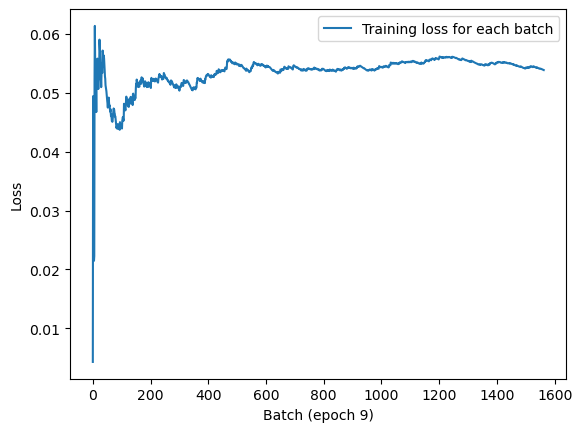

In [45]:
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=[LossHistory()],
    validation_data=(val_images, val_labels),
)

### 텐서보드

**텐서보드**(TensorBoard)는 모델 훈련과정을 모니터링하는 최고의 어플이며
텐서플로우와 함께 기본적으로 설치된다.

In [48]:
model = get_mnist_model()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tensorboard_log_dir",
)

model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard],
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9111 - loss: 0.2918 - val_accuracy: 0.9508 - val_loss: 0.1506
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9554 - loss: 0.1452 - val_accuracy: 0.9716 - val_loss: 0.0992
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9642 - loss: 0.1148 - val_accuracy: 0.9734 - val_loss: 0.0916
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9691 - loss: 0.0971 - val_accuracy: 0.9782 - val_loss: 0.0755
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9743 - loss: 0.0826 - val_accuracy: 0.9784 - val_loss: 0.0734
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0754 - val_accuracy: 0.9777 - val_loss: 0.0790
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9789 - loss: 0.0671 - val_accuracy: 0.9789 - val_loss: 0.0727
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.0620 - 

In [50]:
%load_ext tensorboard
%tensorboard --logdir ./tensorboard_log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19357), started 0:03:11 ago. (Use '!kill 19357' to kill it.)

### Writing your own training and evaluation loops

#### Training vs. inference

#### Writing custom training step functions

##### A TensorFlow training step function

In [0]:
%%backend tensorflow
import tensorflow as tf

model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply(gradients, model.trainable_weights)
    return loss

In [0]:
%%backend tensorflow
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]
loss = train_step(inputs, targets)

##### A PyTorch training step function

In [0]:
%%backend torch
import torch

model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

def train_step(inputs, targets):
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
    loss.backward()
    gradients = [weight.value.grad for weight in model.trainable_weights]
    with torch.no_grad():
        optimizer.apply(gradients, model.trainable_weights)
    model.zero_grad()
    return loss

In [0]:
%%backend torch
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]
loss = train_step(inputs, targets)

##### A JAX training step function

In [0]:
%%backend jax
model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()

def compute_loss_and_updates(
    trainable_variables, non_trainable_variables, inputs, targets
):
    outputs, non_trainable_variables = model.stateless_call(
        trainable_variables, non_trainable_variables, inputs, training=True
    )
    loss = loss_fn(targets, outputs)
    return loss, non_trainable_variables

In [0]:
%%backend jax
import jax

grad_fn = jax.value_and_grad(compute_loss_and_updates, has_aux=True)

In [0]:
%%backend jax
optimizer = keras.optimizers.Adam()
optimizer.build(model.trainable_variables)

def train_step(state, inputs, targets):
    (trainable_variables, non_trainable_variables, optimizer_variables) = state
    (loss, non_trainable_variables), grads = grad_fn(
        trainable_variables, non_trainable_variables, inputs, targets
    )
    trainable_variables, optimizer_variables = optimizer.stateless_apply(
        optimizer_variables, grads, trainable_variables
    )
    return loss, (
        trainable_variables,
        non_trainable_variables,
        optimizer_variables,
    )

In [0]:
%%backend jax
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]

trainable_variables = [v.value for v in model.trainable_variables]
non_trainable_variables = [v.value for v in model.non_trainable_variables]
optimizer_variables = [v.value for v in optimizer.variables]

state = (trainable_variables, non_trainable_variables, optimizer_variables)
loss, state = train_step(state, inputs, targets)

#### Low-level usage of metrics

In [0]:
from keras import ops

metric = keras.metrics.SparseCategoricalAccuracy()
targets = ops.array([0, 1, 2])
predictions = ops.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [0]:
values = ops.array([0, 1, 2, 3, 4])
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

In [0]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = ops.array([0, 1, 2])
predictions = ops.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

metric_variables = metric.variables
metric_variables = metric.stateless_update_state(
    metric_variables, targets, predictions
)
current_result = metric.stateless_result(metric_variables)
print(f"result: {current_result:.2f}")

metric_variables = metric.stateless_reset_state()

#### Using fit() with a custom training loop

##### Customizing fit() with TensorFlow

In [0]:
%%backend tensorflow
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply(gradients, self.trainable_weights)

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [0]:
%%backend tensorflow
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [0]:
%%backend tensorflow
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### Customizing fit() with PyTorch

In [0]:
%%backend torch
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        predictions = self(inputs, training=True)
        loss = loss_fn(targets, predictions)

        loss.backward()
        trainable_weights = [v for v in self.trainable_weights]
        gradients = [v.value.grad for v in trainable_weights]

        with torch.no_grad():
            self.optimizer.apply(gradients, trainable_weights)

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [0]:
%%backend torch
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [0]:
%%backend torch
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### Customizing fit() with JAX

In [0]:
%%backend jax
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()

class CustomModel(keras.Model):
    def compute_loss_and_updates(
        self,
        trainable_variables,
        non_trainable_variables,
        inputs,
        targets,
        training=False,
    ):
        predictions, non_trainable_variables = self.stateless_call(
            trainable_variables,
            non_trainable_variables,
            inputs,
            training=training,
        )
        loss = loss_fn(targets, predictions)
        return loss, non_trainable_variables

    def train_step(self, state, data):
        (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        ) = state
        inputs, targets = data

        grad_fn = jax.value_and_grad(
            self.compute_loss_and_updates, has_aux=True
        )

        (loss, non_trainable_variables), grads = grad_fn(
            trainable_variables,
            non_trainable_variables,
            inputs,
            targets,
            training=True,
        )

        (
            trainable_variables,
            optimizer_variables,
        ) = self.optimizer.stateless_apply(
            optimizer_variables, grads, trainable_variables
        )

        logs = {"loss": loss}
        state = (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        )
        return logs, state

In [0]:
%%backend jax
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [0]:
%%backend jax
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

#### Handling metrics in a custom train_step()

##### train_step() metrics handling with TensorFlow

In [0]:
%%backend tensorflow
import keras
from keras import layers

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compute_loss(y=targets, y_pred=predictions)

        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply(gradients, self.trainable_weights)

        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(targets, predictions)

        return {m.name: m.result() for m in self.metrics}

In [0]:
%%backend tensorflow
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### train_step() metrics handling with PyTorch

In [0]:
%%backend torch
import keras
from keras import layers

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        predictions = self(inputs, training=True)
        loss = self.compute_loss(y=targets, y_pred=predictions)

        loss.backward()
        trainable_weights = [v for v in self.trainable_weights]
        gradients = [v.value.grad for v in trainable_weights]

        with torch.no_grad():
            self.optimizer.apply(gradients, trainable_weights)

        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(targets, predictions)

        return {m.name: m.result() for m in self.metrics}

In [0]:
%%backend torch
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### train_step() metrics handling with JAX

In [0]:
%%backend jax
import keras
from keras import layers

class CustomModel(keras.Model):
    def compute_loss_and_updates(
        self,
        trainable_variables,
        non_trainable_variables,
        inputs,
        targets,
        training=False,
    ):
        predictions, non_trainable_variables = self.stateless_call(
            trainable_variables,
            non_trainable_variables,
            inputs,
            training=training,
        )
        loss = self.compute_loss(y=targets, y_pred=predictions)
        return loss, (predictions, non_trainable_variables)

    def train_step(self, state, data):
        (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        ) = state
        inputs, targets = data

        grad_fn = jax.value_and_grad(
            self.compute_loss_and_updates, has_aux=True
        )

        (loss, (predictions, non_trainable_variables)), grads = grad_fn(
            trainable_variables,
            non_trainable_variables,
            inputs,
            targets,
            training=True,
        )
        (
            trainable_variables,
            optimizer_variables,
        ) = self.optimizer.stateless_apply(
            optimizer_variables, grads, trainable_variables
        )

        new_metrics_vars = []
        logs = {}
        for metric in self.metrics:
            num_prev = len(new_metrics_vars)
            num_current = len(metric.variables)
            current_vars = metrics_variables[num_prev : num_prev + num_current]
            if metric.name == "loss":
                current_vars = metric.stateless_update_state(current_vars, loss)
            else:
                current_vars = metric.stateless_update_state(
                    current_vars, targets, predictions
                )
            logs[metric.name] = metric.stateless_result(current_vars)
            new_metrics_vars += current_vars

        state = (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            new_metrics_vars,
        )
        return logs, state